In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

#1. Load Data

df = pd.read_csv('cars.csv')

# Display the first few rows to check
df.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


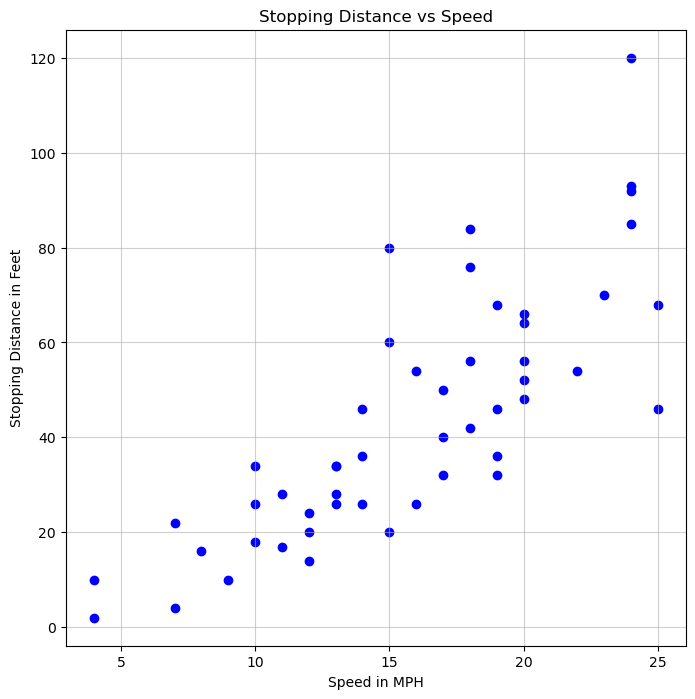

In [39]:
# 2 Visual Inspection

plt.figure(figsize=(8,8))
plt.scatter(df["speed"], df["dist"], color="blue")
plt.xlabel("Speed in MPH")
plt.ylabel("Stopping Distance in Feet")
plt.title("Stopping Distance vs Speed")
plt.grid(True, alpha=0.6)
plt.show()


The graph shows a clear trend that as speed increases, stopping distance also increases; straight line trend is reasonable.

3: Model statement 
Simple Linear equation is:
Distance = b0 + b1 * Speed + e

Distance is Dependent and Speed is Independent

In [40]:
# 4 Estimate Coefficients

X = df["speed"]
Y = df["dist"]

# Add intercept
X_with_const = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(Y, X_with_const)
results = model.fit()

# Print coefficients
print("Intercept (B0):", round(results.params[0], 3))
print("Slope (B1):", round(results.params[1], 3))



Intercept (B0): -16.516
Slope (B1): 3.828


<positron-console-cell-40>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
<positron-console-cell-40>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


In [41]:
# 5 Hypothesis Test
#  Calculate t-statistic for the slope
t_statistic = results.tvalues[1]

# Calculate degrees of freedom
df = len(X) - 2

# Calculate p-value for two-tailed test
p_value = results.pvalues[1]

# Print the t-statistic and p-value
print(f"\nt-statistic: {t_statistic}")
print(f"p-value: {p_value}")


t-statistic: 9.361337676953
p-value: 2.099716476318138e-12


<positron-console-cell-41>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
<positron-console-cell-41>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


5: Hypothesis test for the slope (α = 0.05)

Hypothesis test for the slope (α = 0.05)
H0: Speed has no effect on stopping distance. B1 = 0
H1: Speed DOES have an effect on stopping distance. B1 =/= 0

We should use the t-stat because it is a fairly small set of data and we don't know the population variance

t-statistic: 9.361337676953
p-value: 2.099716476318138e-12 Very Small!

 Reject the null hypothesis.
 Since p < 0.05, there is strong relationship between speed and stopping distance.


In [42]:
R2 = results.rsquared
print("R-squared:", R2)

R-squared: 0.646108111451111


6: R² (coefficient of determination)

R-squared = 0.646

This means that almost 65% of the variation in stopping distance is determined by the speed of the vehicle in the model.